In [90]:
import pandas as pd
import numpy as np
from nltk.corpus import brown

In [32]:
def corpus_stream(corpus_name='brown'):
    if corpus_name=='brown':
        for sentence in brown.sents():
            yield [w.lower() for w in sentence]
    else: assert False, f'corpus: {corpus_name} not supported'

In [33]:
def get_topk_elems(generator, k=10):
    l = []
    for x in generator:
        l.append(x)
        if len(l)==k: return l

In [34]:
count_num_words = lambda generator: sum([len(sentence) for sentence in generator])

In [35]:
count_num_words(corpus_stream())

1161192

In [36]:
num_sentences = len([0 for _ in corpus_stream()])

In [61]:
def corpus_split(split, corpus_name='brown'):
    if corpus_name=='brown':
        if split=='train': 
            start, end = 0, int(num_sentences*0.62)
        elif split=='dev': 
            start, end = int(num_sentences*0.62), int(num_sentences*0.82)
        elif split=='test': 
            start, end = int(num_sentences*0.82), num_sentences
        elif split=='not_test': 
            start, end = 0, int(num_sentences*0.82)
        else: assert False, f'split: {split} is invalid'
    else: assert False, f'corpus: {corpus_name} not supported'
    for idx, sentence in enumerate(corpus_stream(corpus_name)):
        if idx>=start and idx<end:
            yield sentence

In [62]:
count_num_words(corpus_split('train'))

800754

In [63]:
count_num_words(corpus_split('dev'))

196222

In [64]:
count_num_words(corpus_split('test'))

164216

In [70]:
def compute_word_counts(stream):
    word_to_count = {}
    for sentence in stream:
        for w in sentence: 
            word_to_count[w] = word_to_count.get(w, 0)+1
    return word_to_count

In [71]:
len(compute_word_counts(corpus_split('train')))

41171

In [96]:
def obtain_vocab(word_to_count, min_freq=4):
    unk_count = sum([0 if c>=min_freq else c for _, c in word_to_count.items()])
    idx_to_winfo = {0: {'word': '<unk>', 'count': unk_count}}
    word_to_info = {'<unk>': {'idx': 0, 'count': unk_count}}
    filtered_count_words = filter(lambda x: x[0]>=min_freq, [(c, w) for w, c in word_to_count.items()])
    sorted_count_word = sorted(filtered_count_words, reverse=True)
    for idx, (count, word) in enumerate(sorted_count_word):
        idx_to_winfo[idx+1] = {'word': word, 'count': count}
        word_to_info[word] = {'idx': idx+1, 'count': count}
    return word_to_info, idx_to_winfo

In [97]:
vocab = obtain_vocab(compute_word_counts(corpus_split('train')))
word_to_info, idx_to_winfo = vocab

In [98]:
len(word_to_info)

13196

In [101]:
print ([idx_to_winfo[idx] for idx in range(5)])

[{'word': '<unk>', 'count': 40475}, {'word': 'the', 'count': 50671}, {'word': ',', 'count': 39577}, {'word': '.', 'count': 30705}, {'word': 'of', 'count': 28363}]


In [99]:
print ([idx_to_winfo[idx] for idx in range(90, 110)])

[{'word': 'made', 'count': 783}, {'word': 'must', 'count': 771}, {'word': 'even', 'count': 766}, {'word': 'then', 'count': 759}, {'word': 'years', 'count': 745}, {'word': 'now', 'count': 742}, {'word': 'after', 'count': 737}, {'word': 'over', 'count': 734}, {'word': 'should', 'count': 724}, {'word': 'state', 'count': 714}, {'word': 'each', 'count': 685}, {'word': 'world', 'count': 667}, {'word': 'man', 'count': 646}, {'word': 'mr.', 'count': 645}, {'word': 'those', 'count': 644}, {'word': 'people', 'count': 630}, {'word': 'through', 'count': 629}, {'word': 'much', 'count': 622}, {'word': 'because', 'count': 612}, {'word': 'before', 'count': 610}]


<AxesSubplot: xlabel='idx'>

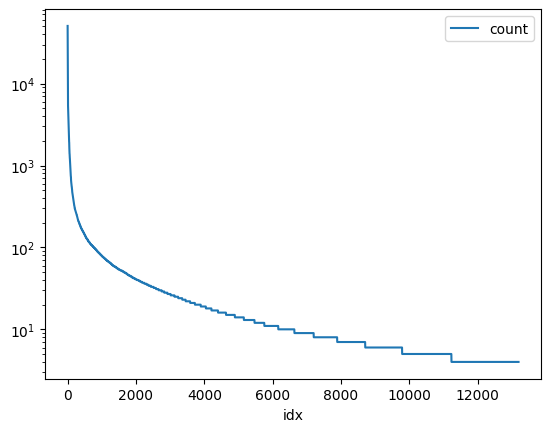

In [95]:
pdf = []
for idx, info in idx_to_winfo.items():
    pdf.append([idx, info['count']])
pdf = pd.DataFrame(pdf, columns=['idx', 'count'])
pdf.plot(x='idx', y='count', logy=True)

In [102]:
def normalize(stream, min_sentence_len=5):
    word_to_info, _ = vocab
    for sentence in stream:
        if len(sentence)>=min_sentence_len:
            yield [w if w in word_to_info else '<unk>' for w in sentence]

In [104]:
print (get_topk_elems(normalize(corpus_split('train'))))

[['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of', "atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['the', 'jury', 'further', 'said', 'in', '<unk>', '<unk>', 'that', 'the', 'city', 'executive', 'committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'city', 'of', 'atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ['the', '<unk>', 'term', 'jury', 'had', 'been', 'charged', 'by', 'fulton', 'superior', 'court', 'judge', '<unk>', '<unk>', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', '<unk>', 'primary', 'which', 'was', 'won', 'by', '<unk>', 'ivan', 'allen', 'jr.', '.'], ['``', 'only', 'a', 'relative', 'handful', 'of', 'such', 'reports', 'was', 'received', "''", ',', 